In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_full_sekres.xlsx')

In [3]:
display(df)

,Unnamed: 0,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,...,engMdoPower_2_,engMdoPower_3_,engMdoPerformance_0_,engMdoPerformance_1_,engMdoPerformance_2_,engMdoPerformance_3_,engMdoConsumption_0_,engMdoConsumption_1_,engMdoConsumption_2_,engMdoConsumption_3_
0,0,2020-01-30 00:00:00.000,0,0.0,0,250.0,250,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
1,1,2020-01-30 00:00:00.999,0,0.0,0,250.0,250,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
2,2,2020-01-30 00:00:01.999,0,0.0,0,250.0,250,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
3,3,2020-01-30 00:00:02.999,1,0.0,0,250.0,249,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
4,4,2020-01-30 00:00:04.000,1,0.0,0,250.0,249,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604795,604795,2020-02-05 23:59:55.007,-20,1386.0,2037,631.0,0,2,3,0,...,0,1043,0.0,222.037,0,210.362,0.0,255.15,0.0,253.65
604796,604796,2020-02-05 23:59:56.009,11,1408.0,2009,612.0,0,2,3,0,...,0,952,0.0,212.690,0,235.104,0.0,259.90,0.0,258.75
604797,604797,2020-02-05 23:59:57.007,11,1430.0,2116,697.0,0,2,3,0,...,0,1062,0.0,216.045,0,213.359,0.0,263.25,0.0,261.95
604798,604798,2020-02-05 23:59:58.008,17,1430.0,2015,602.0,0,2,3,0,...,0,996,0.0,223.550,0,222.416,0.0,263.35,0.0,256.10


In [375]:
soc = df.copy()

In [376]:
# SOC start is 80% of 620 kWh which is 496 kWh
soc['SOC'] = 0
#soc.loc[0,'SOC'] = 496

In [402]:
# SOC start is 80% of 620 kWh which is 498 kWh
#pp = soc['SOC'].values
pp = [0]*604800
pp[0] = 496

bat = soc['battery_0__actualPower'].values
bat = bat/3600 #kWh of energy delivered one second


In [403]:
for i in range(len(pp)):
    if i == 0:
        pass
    if i > 0 and i <= 604799:
        pp[i] = pp[i-1] - (bat[i])

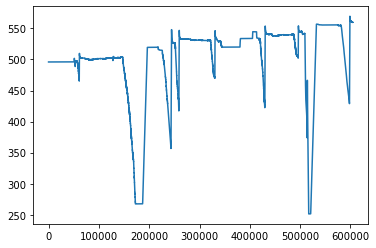

In [404]:
plt.plot(pp)

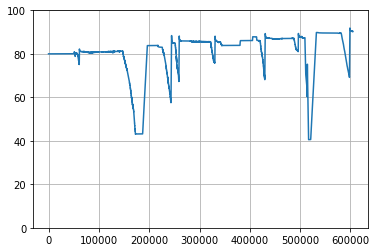

In [405]:
pprosent = [0]*604800

for x in range (len(pprosent)):
    pprosent[x] = pp[x]*100/620
    
plt.plot(pprosent)
plt.ylim(0,100)
plt.grid()
plt.title('Time Series State of Charge')

In [406]:
soc['SOC'] = np.array(pp)

In [407]:
soc['SOC%'] = np.array(pprosent)

In [408]:
display(soc)

,Unnamed: 0,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,...,engMdoPerformance_0_,engMdoPerformance_1_,engMdoPerformance_2_,engMdoPerformance_3_,engMdoConsumption_0_,engMdoConsumption_1_,engMdoConsumption_2_,engMdoConsumption_3_,SOC,SOC%
0,0,2020-01-30 00:00:00.000,0,0.0,0,250.0,250,0,6,0,...,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00,496.000000,80.000000
1,1,2020-01-30 00:00:00.999,0,0.0,0,250.0,250,0,6,0,...,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00,496.000000,80.000000
2,2,2020-01-30 00:00:01.999,0,0.0,0,250.0,250,0,6,0,...,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00,496.000000,80.000000
3,3,2020-01-30 00:00:02.999,1,0.0,0,250.0,249,0,6,0,...,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00,495.999722,79.999955
4,4,2020-01-30 00:00:04.000,1,0.0,0,250.0,249,0,6,0,...,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00,495.999444,79.999910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604795,604795,2020-02-05 23:59:55.007,-20,1386.0,2037,631.0,0,2,3,0,...,0.0,222.037,0,210.362,0.0,255.15,0.0,253.65,559.867778,90.301254
604796,604796,2020-02-05 23:59:56.009,11,1408.0,2009,612.0,0,2,3,0,...,0.0,212.690,0,235.104,0.0,259.90,0.0,258.75,559.864722,90.300762
604797,604797,2020-02-05 23:59:57.007,11,1430.0,2116,697.0,0,2,3,0,...,0.0,216.045,0,213.359,0.0,263.25,0.0,261.95,559.861667,90.300269
604798,604798,2020-02-05 23:59:58.008,17,1430.0,2015,602.0,0,2,3,0,...,0.0,223.550,0,222.416,0.0,263.35,0.0,256.10,559.856944,90.299507


Text(0.5, 1.0, 'Battery SOC with 80% start')

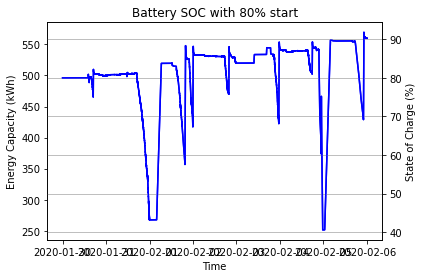

In [416]:
x = soc['datetime']
y1 = soc['SOC']
y2 = soc['SOC%']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.plot(x, y2, 'b-')
ax2.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('Energy Capacity (kWh)')
ax2.set_ylabel('State of Charge (%)')
ax1.set_title('Battery SOC with 80% start')